In [1]:
import numpy as np
import pandas as pd
# import bcolz
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
data_path = 'data/'
seed=100

In [4]:
def get_submission(test,item_cnt_month):
    sub = test.copy()
    sub['item_cnt_month'] = item_cnt_month
    sub.drop(['item_id','shop_id'],axis=1,inplace=True)
    sub.to_csv(data_path + 'submission.csv',index=False)
    return sub

In [5]:
transactions    = pd.read_csv(os.path.join(data_path, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(data_path, 'items.csv'),encoding ='ISO-8859-1')
item_categories = pd.read_csv(os.path.join(data_path, 'item_categories.csv'),encoding ='ISO-8859-1')
shops           = pd.read_csv(os.path.join(data_path, 'shops.csv'),encoding ='ISO-8859-1')
test            = pd.read_csv(os.path.join(data_path, 'test.csv.gz'))

In [6]:
print(transactions.shape)
print(test.shape)

(2935849, 6)
(214200, 3)


In [7]:
transactions['date_format'] = pd.to_datetime(transactions.date,format='%d.%m.%Y')

# Facts:
Data has no missing values

Not all shop_id in train set are used in test set. Test set excludes following shops (not vice versa) [0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54]

Not all item in train set are in test set and vice versa

In test set, a fixed set of items (5100) are used for each shop_id, and each item only appears one per each shop

# EDA

In [10]:
transactions.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_format
0,02.01.2013,0,59,22154,999.0,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.0,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.0,-1.0,2013-01-05


In [18]:
pd.set_option('float_format', '{:0.2f}'.format)

In [19]:
transactions.item_cnt_day.describe()

count   2935849.00
mean          1.24
std           2.62
min         -22.00
25%           1.00
50%           1.00
75%           1.00
max        2169.00
Name: item_cnt_day, dtype: float64

# Sum of items count per month

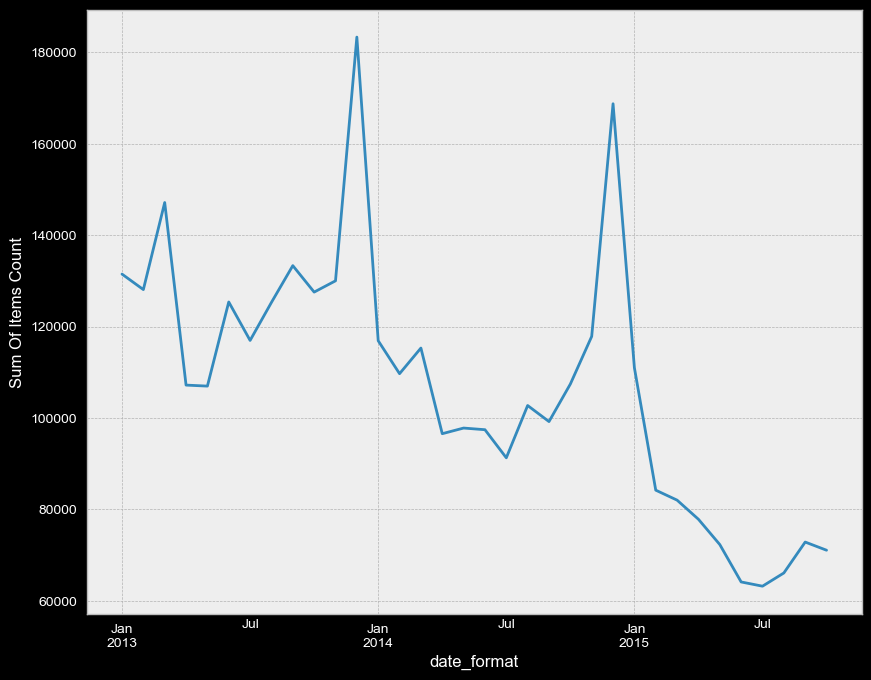

In [38]:
plt.style.use('bmh')
plt.figure(figsize=(10, 8), dpi=100)
plt.ylabel("Sum Of Items Count")
transactions.copy().set_index('date_format').item_cnt_day.resample('M') \
                            .sum().plot();

# Mean of items count per month

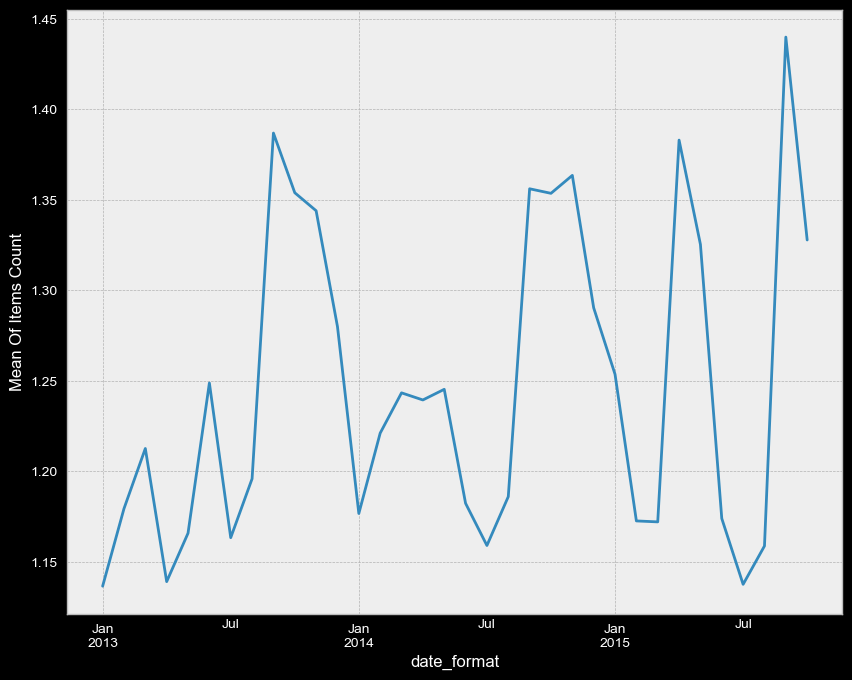

In [39]:
plt.style.use('bmh')
plt.figure(figsize=(10, 8), dpi=100)
plt.ylabel("Mean Of Items Count")
transactions.copy().set_index('date_format').item_cnt_day.resample('M') \
                            .mean().plot();

# Sum and mean of October items count

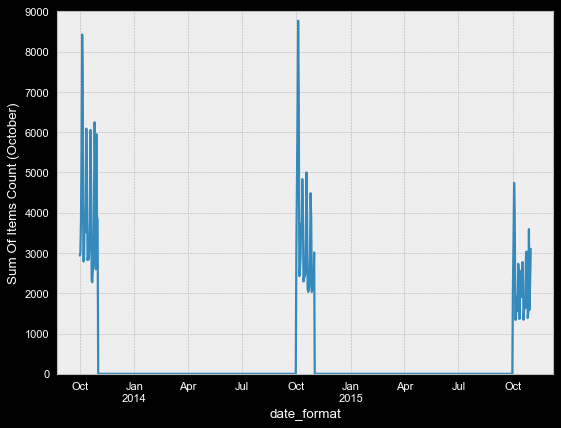

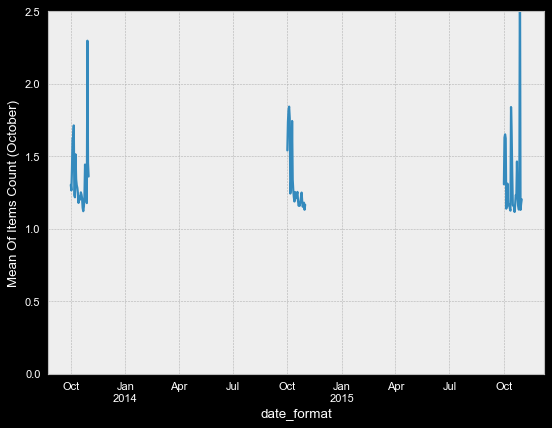

In [52]:
# get oct sales per each day

plt.style.use('bmh')
fig=plt.figure(figsize=(8, 6), dpi=80)
plt.ylabel("Sum Of Items Count (October)")
transactions[list(map(lambda x: x.month in [10] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
fig=plt.figure(figsize=(8, 6), dpi=80)
plt.ylabel("Mean Of Items Count (October)")
transactions[list(map(lambda x: x.month in [10] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show()

# Sum and mean of November items count

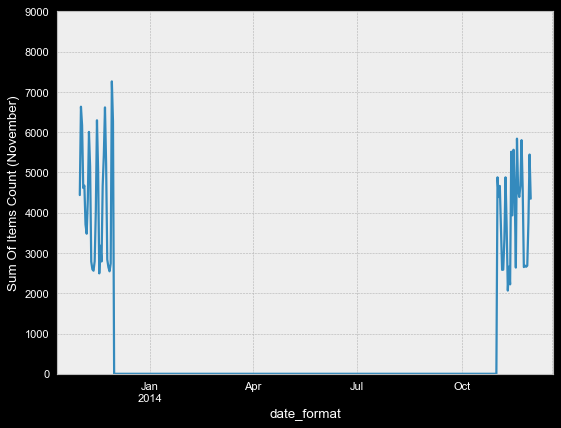

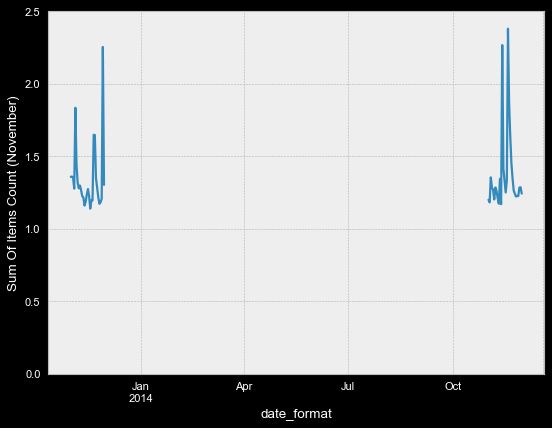

In [53]:
# get nov sales per each day
plt.style.use('bmh')
fig=plt.figure(figsize=(8, 6), dpi=80)
plt.ylabel("Sum Of Items Count (November)")
transactions[list(map(lambda x: x.month in [11] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
fig=plt.figure(figsize=(8, 6), dpi=80)
plt.ylabel("Sum Of Items Count (November)")
transactions[list(map(lambda x: x.month in [11] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show()

# Sum and mean of December items count

In [ ]:
# get dec sales per each day
plt.style.use('bmh')
fig=plt.figure(figsize=(8, 6), dpi=80)
plt.ylabel("Sum Of Items Count (December)")
transactions[list(map(lambda x: x.month in [12] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
fig=plt.figure(figsize=(8, 6), dpi=80)
plt.ylabel("Sum Of Items Count (December)")
transactions[list(map(lambda x: x.month in [12] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show()

# Exploratory Data Analysis

Basic data analysis is done, including plotting sum and mean of item_cnt_day for each month to find some patterns, exploring missing values, inspecting test set …

Here are few things interesting I found from doing EDA:

> - Number of sold items declines over the year
> - There are peaks in November and similar item count zic-zac behaviors in June-July-August. This inspires me to look up Russia national holiday and create a Boolean holiday features. More information can be found in ‘Feature Engineering’ section
> - Data has no missing values

> - Some interesting information from test set analysis:
>  > - Not all shop_id in training set are used in test set. Test set excludes following shops (but not vice versa): [0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54]
>  > - Not all item in train set are in test set and vice versa
>  > - In test set, a fixed set of items (5100) are used for each shop_id, and each item only appears one per each shop. This possibly means that items are picked from a generator, which will result in lots of 0 for item count. Therefore, generating all possible shop-item pairs for each month in train set and assigning missing item count with 0 makes sense.